<a href="https://colab.research.google.com/github/bartwronski/BlogPostsExtraMaterial/blob/master/Analyze_artists_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')


In [2]:
df = pd.read_json('MyActivity.json')
print(df.columns)
print(df[0:10][['title', 'description', 'time']])

Index(['header', 'title', 'subtitles', 'description', 'time', 'products',
       'titleUrl'],
      dtype='object')
                         title description                      time
0  Listened to Jynweythek Ylow  Aphex Twin  2019-12-31T23:33:55.865Z
1       Listened to Untitled 3  Aphex Twin  2019-12-31T23:26:23.465Z
2                Listened to 4  Aphex Twin  2019-12-31T23:22:46.829Z
3               Listened to #3  Aphex Twin  2019-12-31T23:15:02.427Z
4           Listened to Nanou2  Aphex Twin  2019-12-31T23:11:36.944Z
5  Listened to Alberto Balsalm  Aphex Twin  2019-12-31T23:06:25.999Z
6             Listened to Xtal  Aphex Twin  2019-12-31T23:01:32.538Z
7       Listened to Avril 14th  Aphex Twin  2019-12-31T22:59:27.321Z
8        Listened to Fingerbib  Aphex Twin  2019-12-31T22:55:37.856Z
9              Listened to #17  Aphex Twin  2019-12-31T22:53:32.866Z


In [0]:
df.rename(columns = {'description':'Artist'}, inplace=True)
df['time'] = df['time'].apply(pd.to_datetime)
df['time'] = df['time'].dt.tz_convert('America/Los_Angeles')
listened_activities = df.loc[df['title'].str.startswith('Listened to')]

In [4]:
listened_activities[1:10]

,header,title,subtitles,Artist,time,products,titleUrl
1,Google Play Music,Listened to Untitled 3,[{'name': 'Served location and activity-based ...,Aphex Twin,2019-12-31 15:26:23.465000-08:00,[Google Play Music],NaN
2,Google Play Music,Listened to 4,[{'name': 'Served location and activity-based ...,Aphex Twin,2019-12-31 15:22:46.829000-08:00,[Google Play Music],NaN
3,Google Play Music,Listened to #3,[{'name': 'Served location and activity-based ...,Aphex Twin,2019-12-31 15:15:02.427000-08:00,[Google Play Music],NaN
4,Google Play Music,Listened to Nanou2,[{'name': 'Served location and activity-based ...,Aphex Twin,2019-12-31 15:11:36.944000-08:00,[Google Play Music],NaN
5,Google Play Music,Listened to Alberto Balsalm,[{'name': 'Served location and activity-based ...,Aphex Twin,2019-12-31 15:06:25.999000-08:00,[Google Play Music],NaN
6,Google Play Music,Listened to Xtal,[{'name': 'Served location and activity-based ...,Aphex Twin,2019-12-31 15:01:32.538000-08:00,[Google Play Music],NaN
7,Google Play Music,Listened to Avril 14th,[{'name': 'Served location and activity-based ...,Aphex Twin,2019-12-31 14:59:27.321000-08:00,[Google Play Music],NaN
8,Google Play Music,Listened to Fingerbib,[{'name': 'Served location and activity-based ...,Aphex Twin,2019-12-31 14:55:37.856000-08:00,[Google Play Music],NaN
9,Google Play Music,Listened to #17,[{'name': 'Served location and activity-based ...,Aphex Twin,2019-12-31 14:53:32.866000-08:00,[Google Play Music],NaN


In [5]:
listened_activities_2019 = listened_activities.loc[(listened_activities['time'] >= '2019-01-01') & (listened_activities['time'] < '2020-01-01')]
artist_totals = listened_activities_2019.groupby('Artist').size().reset_index(name='Play counts')
top = artist_totals.sort_values('Play counts', ascending=False).set_index('Artist')[0:18]
print(top)

                       Play counts
Artist                            
The Chemical Brothers          151
Rancid                         144
AFI                             98
blink-182                       89
Show Me The Body                69
The Libertines                  68
Ladytron                        64
Flying Lotus                    64
Boards Of Canada                62
Operation Ivy                   62
808 State                       62
Punish Yourself                 61
Lone                            60
Mest                            58
Refused                         54
Aphex Twin                      54
Dorian Electra                  53
Martyn                          52


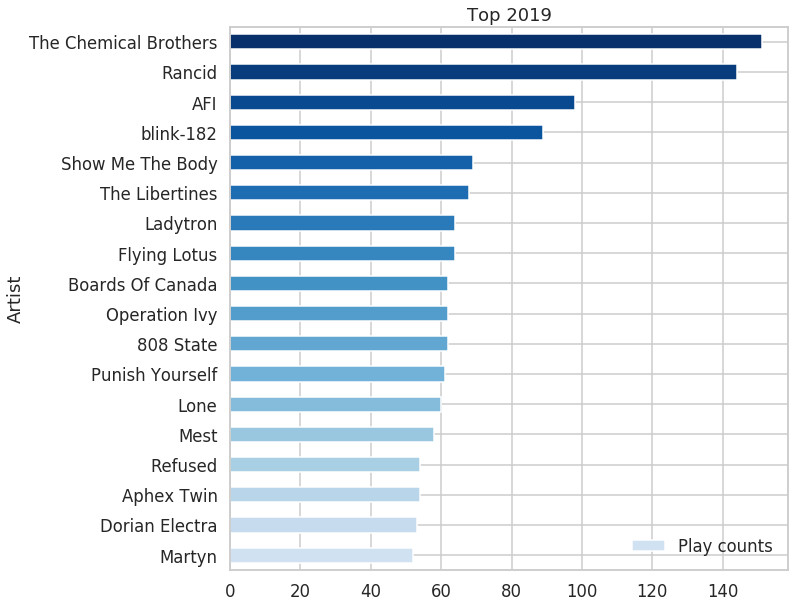

In [6]:
colormap = [plt.cm.Blues(np.linspace(0.2,1.0,len(top)))]
sns.set_style("whitegrid")
sns.set_context("talk")
plt.rcParams['figure.figsize'] = [10, 10]
top[::-1].plot(kind='barh', color=colormap, edgecolor='w')
plt.title('Top 2019')
plt.show()

In [7]:
listened_morning_2019 = listened_activities_2019.loc[(listened_activities['time'].dt.hour >= 6) & (listened_activities['time'].dt.hour <= 10)]
artist_totals_morning = listened_morning_2019.groupby('Artist').size().reset_index(name='Play counts')
top_morning = artist_totals_morning.sort_values('Play counts', ascending=False).set_index('Artist')[0:10]
top_morning

,Play counts
Artist,
Rancid,41
Soulwax,40
AFI,37
IDLES,32
Amon Amarth,31
Franz Ferdinand,29
Choking Victim,29
Blanck Mass,28
The Comet Is Coming,28


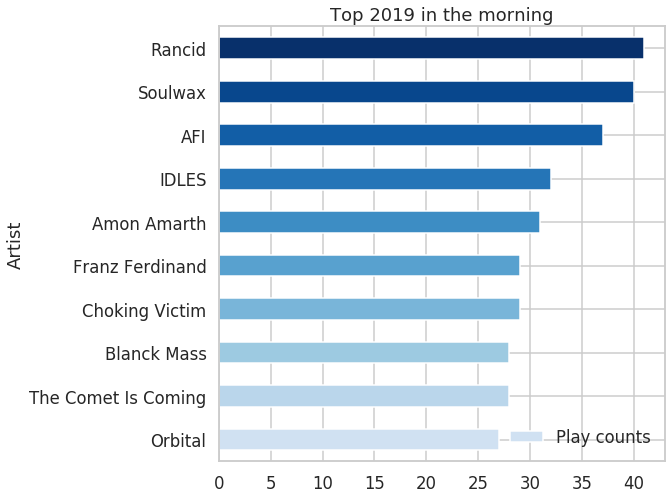

In [8]:
colormap = [plt.cm.Blues(np.linspace(0.2,1.0,len(top_morning)))]
plt.rcParams['figure.figsize'] = [8, 8]
top_morning[::-1].plot(kind='barh', color=colormap, edgecolor='w')
plt.title('Top 2019 in the morning')
plt.show()

In [9]:
listened_evening_2019 = listened_activities_2019.loc[(listened_activities['time'].dt.hour > 19) | (listened_activities['time'].dt.hour < 3)]
artist_totals_evening = listened_evening_2019.groupby('Artist').size().reset_index(name='Play counts')
top_evening = artist_totals_evening.sort_values('Play counts', ascending=False).set_index('Artist')[0:10]
top_evening

,Play counts
Artist,
Boards Of Canada,37
Leftfield,32
Paula Temple,28
The Chemical Brothers,28
The Libertines,26
Lone,24
Dorian Electra,20
Vespa,20
Refused,20


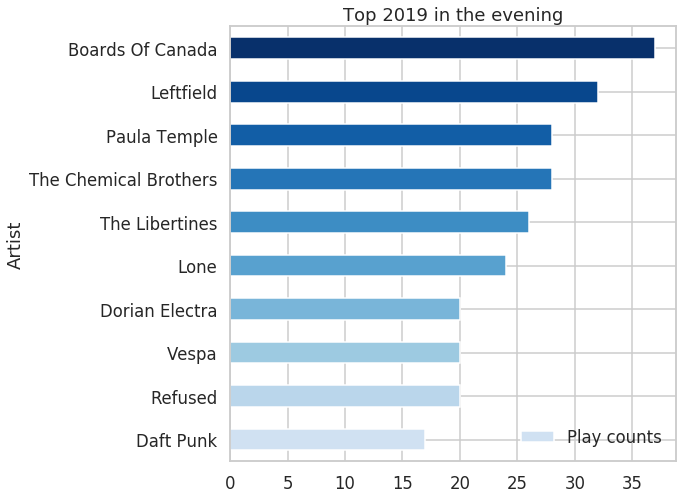

In [10]:
colormap = [plt.cm.Blues(np.linspace(0.2,1.0,len(top_evening)))]
plt.rcParams['figure.figsize'] = [8, 8]
top_evening[::-1].plot(kind='barh', color=colormap, edgecolor='w')
plt.title('Top 2019 in the evening')
plt.show()

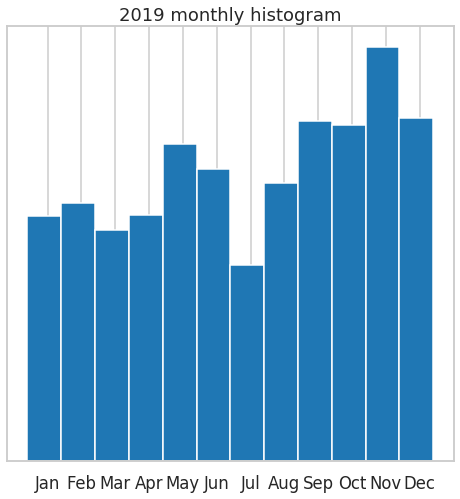

In [11]:
plt.rcParams['figure.figsize'] = [8, 8]
plt.yticks([])
plt.xticks(np.arange(1+0.5/(11/12),12+0.5/(11/12),11/12), ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'))
listened_activities['time'].dt.month.hist(bins=12)
plt.title('2019 monthly histogram')
plt.show()

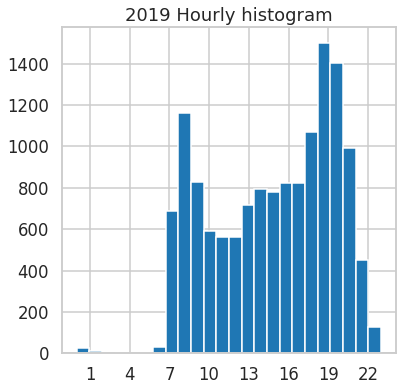

In [12]:
plt.rcParams['figure.figsize'] = [6, 6]
plt.xticks(np.arange(1,23,3))
listened_activities['time'].dt.hour.hist(bins=24)
plt.title('2019 Hourly histogram')
plt.show()

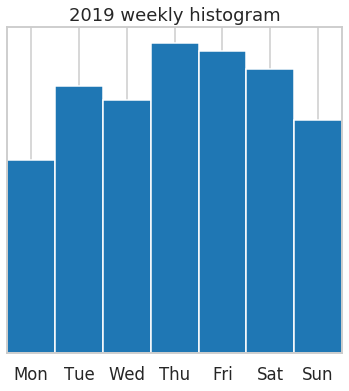

In [13]:
plt.rcParams['figure.figsize'] = [6, 6]
bin_w = 6.0 / 7.0
plt.xticks(np.arange(bin_w/2, bin_w/2 + 6, bin_w), ('Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'))
plt.xlim(0, 6)
plt.yticks([])
listened_activities['time'].dt.weekday.hist(bins=7)
plt.title('2019 weekly histogram')
plt.show()

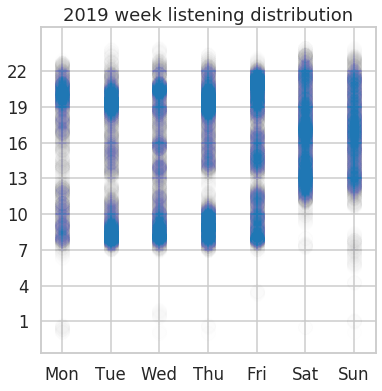

In [14]:
plt.xticks(np.arange(7), ('Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'))
plt.yticks(np.arange(1,23,3))
plt.scatter(listened_activities['time'].dt.weekday.to_numpy(), listened_activities['time'].dt.hour.to_numpy() + listened_activities['time'].dt.minute.to_numpy() / 60, alpha=0.002, s=200.0)
plt.title('2019 week listening distribution')
plt.show()